# 1. What is Hugging Face?

Hugging Face is a company that specializes in natural language processing (NLP) technologies and is widely known for its open-source NLP library called Transformers. Hugging Face's products include the Hugging Face Hub, which is a cloud-based platform for sharing and managing NLP models, and the Hugging Face API, which allows developers to integrate NLP capabilities into their applications. The company is also actively involved in research and development in the field of NLP, and its work has led to several breakthroughs in areas such as language understanding and generation, question-answering, and chatbots.

# 2. The History of LLM/NLP?

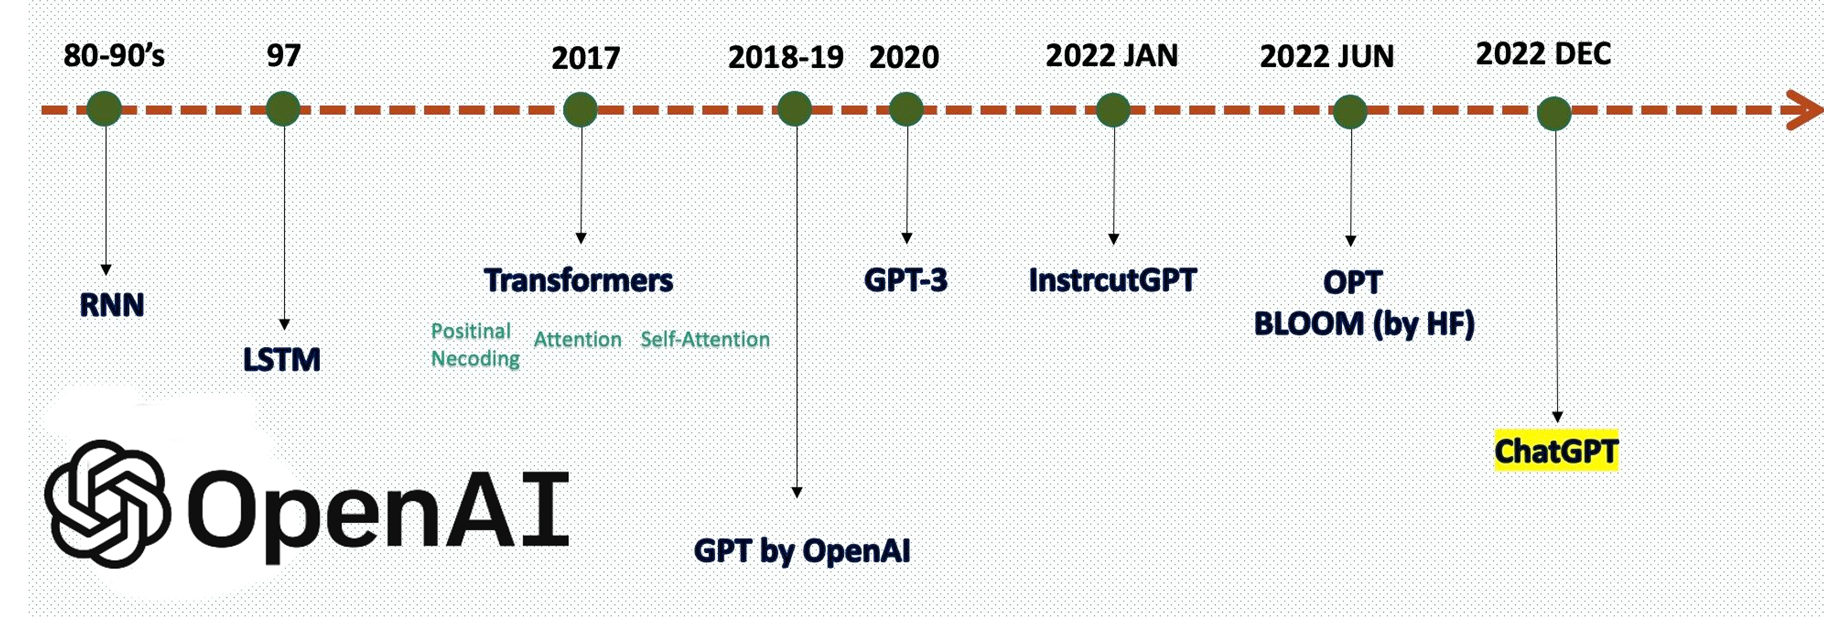

![title](roadmap-1.jpg)

The history of Language Model (LLM) and Natural Language Processing (NLP) has seen a series of advancements to address various limitations:

RNN (Recurrent Neural Networks): Early NLP models had limited contextual understanding due to sequential processing, making it challenging to capture long-range dependencies in text.

LSTM (Long Short-Term Memory): To overcome RNN's limitations, LSTM introduced memory cells to better capture and retain context over longer sequences.

Transformers: Although LSTM improved upon RNNs, it still struggled with parallelization. Transformers revolutionized NLP by introducing attention mechanisms, enabling parallel processing and capturing complex relationships in text.

GPT (Generative Pre-trained Transformer) by OpenAI: GPT models leveraged Transformers and large-scale pre-training to generate human-like text. However, early GPT models had limitations in controlling generated content.

InstructGPT (by OpenAI): To address GPT's limitations, InstructGPT models were introduced, allowing users to instruct the model and receive more specific responses.

GPT-3: Building upon earlier GPT models, GPT-3 improved scale and performance, becoming a cornerstone in NLP, yet it faced challenges in fine-tuning and control.

OPT Bloom (by Hugging Face): OPT Bloom aimed to enhance fine-tuning and model control but still had certain limitations.

ChatGPT: ChatGPT models refined conversational capabilities, making it more effective for dialog systems. However, they faced challenges in maintaining coherent and contextually accurate conversations.

Higher Order ChatGPT: As a response to ChatGPT's limitations, higher-order ChatGPT models were introduced, representing the most powerful LLM to date, with better context management and human-like responses.

These developments in NLP and LLM models have come a long way, and they continue to evolve rapidly, with more models being introduced to address specific use cases and shortcomings in previous iterations.

## 3. Difference in output of all 3 models 

![title](img2.jpg)

## Why chatgpt models are working best

It is a bidirectional Transformer model, which means it considers both right and left context while making predictions. Due to its large dataset and size, it can perform Natural Language Processing (NLP) tasks such as summarisation, answering questions, sentiment analysis, and language translation.

# 3. The Climax of Deep Learning 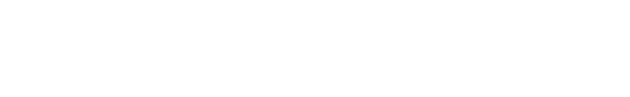

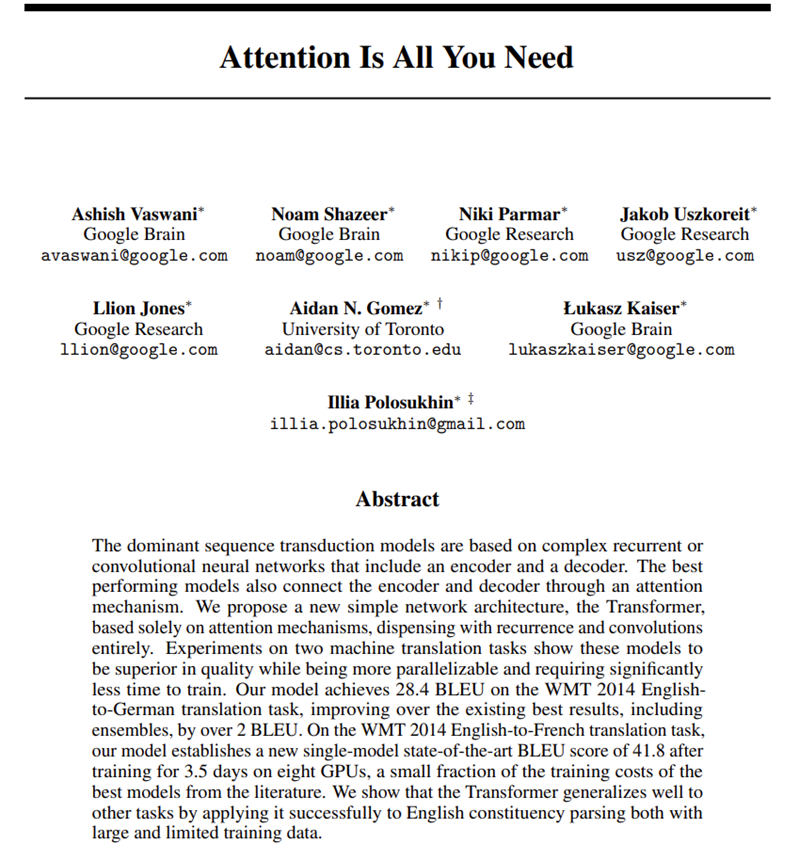

# 4. Let's Finetune NMT (Neural Machine Translation) Pipeline 

## LOAD DATA

In [1]:
! pip install huggingface 
! pip install datasets

In [2]:
! pip install transformers 
! pip install tokenizers

In [2]:
#! pip install --upgrade pip


In [3]:
! pip install transformers 


In [4]:
! pip install --upgrade setuptools wheel


   ---------------------------------------- 0.0/807.9 kB ? eta -:--:--
   ---- ----------------------------------- 81.9/807.9 kB 2.3 MB/s eta 0:00:01
   ----------- ---------------------------- 225.3/807.9 kB 2.8 MB/s eta 0:00:01
   ----------- ---------------------------- 225.3/807.9 kB 2.8 MB/s eta 0:00:01
   ----------- ---------------------------- 225.3/807.9 kB 2.8 MB/s eta 0:00:01
   ----------- ---------------------------- 225.3/807.9 kB 2.8 MB/s eta 0:00:01
   ----------- ---------------------------- 225.3/807.9 kB 2.8 MB/s eta 0:00:01
   ---------------- ----------------------- 327.7/807.9 kB 1.0 MB/s eta 0:00:01
   ---------------- ----------------------- 327.7/807.9 kB 1.0 MB/s eta 0:00:01
   ---------------- ----------------------- 327.7/807.9 kB 1.0 MB/s eta 0:00:01
   ---------------- ----------------------- 327.7/807.9 kB 1.0 MB/s eta 0:00:01
   ------------------ ------------------- 399.4/807.9 kB 829.7 kB/s eta 0:00:01
   ------------------ ------------------- 399.4/80

In [4]:
! pip install --upgrade tokenizers


In [5]:
! pip install matplotlib

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from huggingface_hub import notebook_login
from datasets import load_dataset, load_metric
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer, DataCollatorForSeq2Seq

c:\Users\HP\Visual Studio Code Project\Fine Tunning Hugging Face Models(NLP)\new_fine\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
data = load_dataset("kde4", lang1="en", lang2="es")
data

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 218655
    })
})

The "kde4" dataset typically contains parallel text data in two languages: English (lang1) and Spanish (lang2). It's used for machine translation tasks where you have a set of sentences or documents in English and their corresponding translations in Spanish.

In [8]:
small = data["train"].shuffle(seed=42).select(range(1000))
split = small.train_test_split(seed=42, test_size=0.2)
split

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 800
    })
    test: Dataset({
        features: ['id', 'translation'],
        num_rows: 200
    })
})

In [9]:
split["test"][0], split["train"][0]

({'id': '39088', 'translation': {'en': 'krdc', 'es': 'krdc'}},
 {'id': '130628', 'translation': {'en': 'Action', 'es': 'Acción'}})

## Tokenization

Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning.

In [10]:
! pip install sentencepiece

In [11]:
import sentencepiece

In [12]:
from transformers import AutoTokenizer

In [13]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


In [14]:
#checkpoint = "Helsinki-NLP/opus-mt-en-es"
#tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [15]:
en_sample = split['train'][5]['translation']['en']
es_sample = split['train'][5]['translation']['es']

print("English : ", en_sample)
print("Spanish : ", es_sample)

English :  Screenshot & kaudiocreator; enter title for song 1 and album data
Spanish :  Captura de pantalla de & kaudiocreator; en la que se introduce el título de la canción 1 y los datos del álbum


In [16]:
inputs = tokenizer(en_sample)
targets = tokenizer(text_target=es_sample)

print("Input IDs : ", inputs['input_ids'])
print("Target IDs : ", targets['input_ids'])

Input IDs :  [101, 12117, 12326, 1004, 10556, 21041, 10085, 16416, 4263, 1025, 4607, 2516, 2005, 2299, 1015, 1998, 2201, 2951, 102]
Target IDs :  [101, 14408, 4648, 2139, 6090, 9080, 2721, 2139, 1004, 10556, 21041, 10085, 16416, 4263, 1025, 4372, 2474, 10861, 7367, 8970, 3449, 14841, 8525, 4135, 2139, 2474, 2064, 10446, 1015, 1061, 3050, 23755, 2891, 3972, 2201, 102]


In [17]:
# tokenizer.convert_ids_to_tokens(targets['input_ids']), tokenizer.convert_ids_to_tokens(inputs['input_ids'])

#### Analyze Token Lengths

# Setting Maximum input length and Maximum  

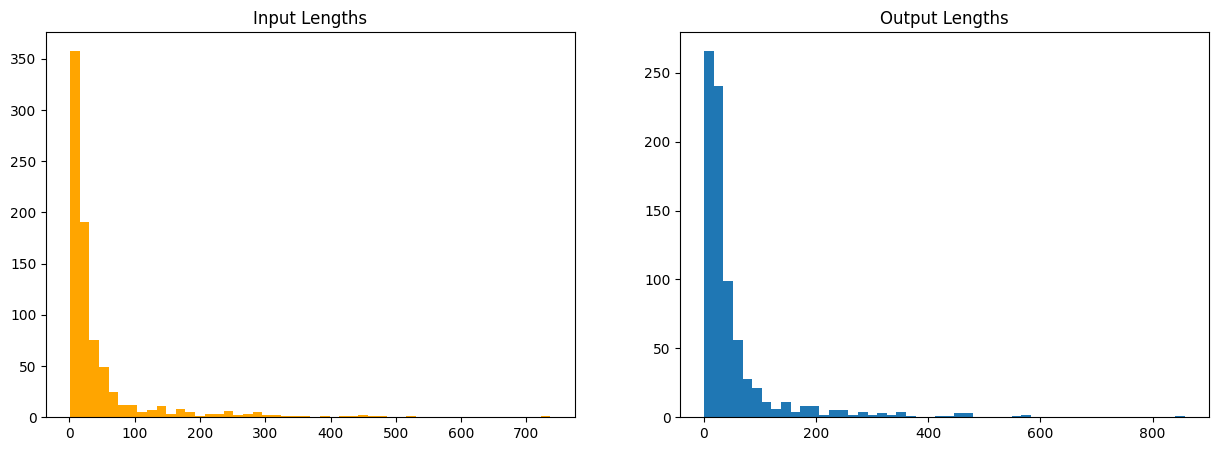

In [18]:
train = split['train']['translation']
input_lens = [len(tr['en']) for tr in train]
output_lens = [len(tr['es']) for tr in train]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(input_lens, bins=50, label='input', color='orange')
plt.title('Input Lengths')

plt.subplot(1, 2, 2)
plt.hist(output_lens, bins=50, label='output')
plt.title('Output Lengths')

plt.show()

In [19]:
input_lens = pd.Series(input_lens)
output_lens = pd.Series(output_lens)

print("## Input Lengths ##")
print(input_lens.describe())

print("\n## Output Lengths ##")
print(output_lens.describe())

## Input Lengths ##
count    800.000000
mean      43.155000
std       74.383093
min        1.000000
25%       10.000000
50%       17.000000
75%       39.000000
max      737.000000
dtype: float64

## Output Lengths ##
count    800.000000
mean      53.602500
std       84.274728
min        1.000000
25%       15.000000
50%       26.000000
75%       51.250000
max      857.000000
dtype: float64


In [19]:
max_input_len = 128
max_target_len = 128

def tokenizer_fn(batch):
    inputs = [x['en'] for x in batch['translation']]
    targets = [x['es'] for x in batch['translation']]

    tokenized_inputs = tokenizer(
                                inputs, 
                                max_length=max_input_len, 
                                truncation=True  # truncating the length and not keeping maximum length tokens 
                                )

    tokenized_targets = tokenizer(
                                text_target=targets, 
                                max_length=max_target_len, 
                                truncation=True
                                )
  
    tokenizer_full = tokenized_inputs.copy()
    tokenizer_full['labels'] = tokenized_targets['input_ids']
    return tokenizer_full


# defines a Python function called tokenizer_fn, which is designed to preprocess and tokenize a batch 
# of text data for a translation task. This function takes a batch of data, tokenizes both the input and 
# target text, and returns the tokenized data in a format suitable for training a translation model

In [20]:
tokenized_datasets = split.map(
                            tokenizer_fn,
                            batched=True,
                            remove_columns=split['train'].column_names,
                            )
# this code efficiently processes a dataset of translation examples using the specified 
# tokenization function, removes any unwanted columns, and stores the processed data in 
# the tokenized_datasets variable. This preprocessed data is typically used for training 
# and evaluating machine translation models.

#### Evaluation Metrics

            1.  BLEU Score (in this case it will be not good way to evaluate as it use words and not context)
                    - use n-gram & take weighted average
                    - BLEU score has the range of 0 to 1 or 0 to 100
            2.  BERT Score
                    - BERT generate contextual embeddings for input and target sentences
                    - BERT score is the cosine similarity between the embeddings

In [21]:
! pip install sacrebleu

In [25]:
! pip install bert_score

In [22]:
# just compare 2 metrics

sentence1 = "I'm so hungry"
sentence2 = ["I'm starving"]

bleu_metric = load_metric("sacrebleu")
bert_metric = load_metric("bertscore")

print("BLEU Score : ", bleu_metric.compute(predictions=[sentence1], references=[sentence2]))
print("BERT Score : ", bert_metric.compute(predictions=[sentence1], references=[sentence2], lang='en'))


C:\Users\HP\AppData\Local\Temp\ipykernel_28012\1801055024.py:6: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric = load_metric("sacrebleu")


BLEU Score :  {'score': 0.0, 'counts': [1, 0, 0, 0], 'totals': [3, 2, 1, 0], 'precisions': [33.333333333333336, 25.0, 25.0, 0.0], 'bp': 1.0, 'sys_len': 3, 'ref_len': 2}


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT Score :  {'precision': [0.9424826502799988], 'recall': [0.9716500043869019], 'f1': [0.9568440914154053], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.34.1)'}


In [23]:
def compute_metrics(
                    preds_and_labels,
                    bleu_metric = load_metric("sacrebleu"),
                    bert_metric = load_metric("bertscore")
                    ):

    preds, labels = preds_and_labels
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    # for any -100 label, replace with pad token id
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

    # convert labels into words
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [[label.strip()] for label in decoded_labels]

    bleu = bleu_metric.compute(
                                predictions=decoded_preds, 
                                references=decoded_labels
                                )
    bert_score = bert_metric.compute(
                                    predictions=decoded_preds, 
                                    references=decoded_labels, 
                                    lang='fr'
                                    )

    return {
            "bleu": bleu["score"], 
            'bert_score': np.mean(bert_score['f1'])
            }

In [24]:
from transformers import BartForConditionalGeneration, AutoTokenizer


In [31]:
! pip install transformers[torch]

   ---------------------------------------- 0.0/258.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.1 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.1 kB 150.6 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/258.1 kB 150.6 kB/s eta 0:00:02
   --------- ----------------------------- 61.4/258.1 kB 172.4 kB/s eta 0:00:02
   --------- ----------------------------- 61.4/258.1 kB 172.4 kB/s eta 0:00:02
   ------------ -------------------------- 81.9/258.1 kB 169.9 kB/s eta 0:00:02
   ------------ -------------------------- 81.9/258.1 kB 169.9 kB/s eta 0:00:02
   ------------- -

In [25]:
! pip install accelerate -U

In [26]:
! pip install accelerate>=0.20.1


In [28]:
checkpoint = "facebook/bart-large-cnn"
from transformers import BartForConditionalGeneration, BartTokenizer

In [29]:
# Load the BART model and tokenizer
Seq2SeqLM = BartForConditionalGeneration.from_pretrained(checkpoint)
tokenizer = BartTokenizer.from_pretrained(checkpoint)

data_collator = DataCollatorForSeq2Seq(tokenizer, model=Seq2SeqLM)

training_args = Seq2SeqTrainingArguments(
                                        "finetuned-model",
                                        evaluation_strategy="no",
                                        save_strategy="epoch",
                                        learning_rate=2e-5,
                                        per_device_train_batch_size=8,
                                        per_device_eval_batch_size=4,
                                        weight_decay=0.01,
                                        save_total_limit=3,
                                        num_train_epochs=2,
                                        predict_with_generate=True
                                        )

trainer = Seq2SeqTrainer(
                        Seq2SeqLM,
                        training_args,
                        train_dataset=tokenized_datasets["train"],
                        eval_dataset=tokenized_datasets["test"],
                        data_collator=data_collator,
                        tokenizer=tokenizer,
                        compute_metrics=compute_metrics,
                    )


c:\Users\HP\Visual Studio Code Project\Fine Tunning Hugging Face Models(NLP)\new_fine\Lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


#### Train HF NMT Model

In [27]:
Seq2SeqLM = BartForConditionalGeneration.from_pretrained(checkpoint)
data_collator = DataCollatorForSeq2Seq(tokenizer, model=Seq2SeqLM)

training_args = Seq2SeqTrainingArguments(
                                        "finetuned-model",
                                        evaluation_strategy="no",
                                        save_strategy="epoch",
                                        learning_rate=2e-5,
                                        per_device_train_batch_size=8,
                                        per_device_eval_batch_size=4,
                                        weight_decay=0.01,
                                        save_total_limit=3,
                                        num_train_epochs=2,
                                        predict_with_generate=True
                                        )

trainer = Seq2SeqTrainer(
                        Seq2SeqLM,
                        training_args,
                        train_dataset=tokenized_datasets["train"],
                        eval_dataset=tokenized_datasets["test"],
                        data_collator=data_collator,
                        tokenizer=tokenizer,
                        compute_metrics=compute_metrics,
                    )

You are using a model of type bert to instantiate a model of type bart. This is not supported for all configurations of models and can yield errors.
Some weights of BartForConditionalGeneration were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['decoder.layers.7.encoder_attn.v_proj.weight', 'encoder.layers.0.self_attn_layer_norm.bias', 'decoder.layers.10.self_attn.v_proj.bias', 'decoder.layers.5.self_attn.v_proj.bias', 'encoder.layers.3.self_attn.q_proj.weight', 'decoder.layers.7.encoder_attn.q_proj.weight', 'decoder.layers.3.self_attn.v_proj.weight', 'decoder.layers.1.self_attn.out_proj.weight', 'decoder.layers.8.self_attn_layer_norm.bias', 'encoder.layers.6.self_attn.out_proj.bias', 'decoder.layers.8.self_attn.k_proj.weight', 'decoder.layers.6.fc2.bias', 'encoder.layers.7.self_attn.q_proj.weight', 'encoder.layers.8.final_layer_norm.bias', 'decoder.layers.9.encoder_attn_layer_norm.weight', 'encoder.layers.8.fc2.weight', 'decoder.layers.0.fc

In [30]:
trainer.train()

 14%|█▍        | 29/200 [34:38<4:12:12, 88.49s/it]

In [21]:
trainer.evaluate(max_length=max_target_len)

100%|██████████| 50/50 [03:05<00:00,  3.71s/it]


{'eval_loss': 1.0926491022109985,
 'eval_bleu': 41.8590208412564,
 'eval_bert_score': 0.8993544572591782,
 'eval_runtime': 186.2462,
 'eval_samples_per_second': 1.074,
 'eval_steps_per_second': 0.268,
 'epoch': 3.0}

In [31]:
trainer.save_model("HF_NMT_FINETUNED")

In [34]:
notebook_login()
trainer.push_to_hub()

## Inference with Pipeline

In [1]:
# Use the fine tuned model 
from transformers import pipeline
translator = pipeline("translation", model='HF_NMT_FINETUNED', device=-1)

c:\ProgramData\Anaconda3\envs\datahour\lib\site-packages\transformers\models\marian\tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [2]:
# converting english text to spanish 
translator("Hell yeah ! I finetuned Hugging Face NMT model !", max_length=128)

[{'translation_text': 'Claro que sí, afinado Hugging Face modelo NMT.'}]